## Cats vs Dogs Classification - 21BAI1007


### Importing data From Kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 93.0MB/s]
100% 1.06G/1.06G [00:07<00:00, 155MB/s] 


In [3]:
# Data Loaded from kaggle is in zip format. Need to unzip it
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Loading the data - 21BAI1007

In [4]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
train_cats_path = '/content/train/cats'
train_dogs_path = '/content/train/dogs'
test_cats_path = '/content/test/cats'
test_dogs_path = '/content/test/dogs'

In [6]:
import os
def load_and_preprocess_images(directory, label, target_size=(64, 64)):

    x = []
    y = []

    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            filepath = os.path.join(directory, filename)
            img = cv2.imread(filepath)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)
                x.append(img)
                y.append(label)

    return x,y

In [7]:
import cv2

import numpy as np
X_cats_train, Y_cats_train = load_and_preprocess_images(train_cats_path, label=0)

X_dogs_train, Y_dogs_train = load_and_preprocess_images(train_dogs_path, label=1)

x_train = X_cats_train + X_dogs_train
y_train = Y_cats_train + Y_dogs_train

X_train = np.array(x_train)
Y_train = np.array(y_train)

X_cats_test, Y_cats_test = load_and_preprocess_images(test_cats_path, label=0)

X_dogs_test, Y_dogs_test = load_and_preprocess_images(test_dogs_path, label=1)

x_test = X_cats_test + X_dogs_test
y_test = Y_cats_test + Y_dogs_test

X_test = np.array(x_test)
Y_test = np.array(y_test)

In [27]:
X_train.shape

(20000, 64, 64, 3)

### Creating the model using K Folds Method - 21BAI1007

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cvscores = []
for train_idx, test_idx in kfold.split(X_train, Y_train):

    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    model.fit(X_train[train_idx], Y_train[train_idx], epochs = 5)


    scores = model.evaluate(X_test, Y_test, verbose = 0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
    cvscores.append(scores[1] * 100)

Epoch 1/5
500/500 [==============================] - 3s 4ms/step - loss: 0.6846 - accuracy: 0.6625
Epoch 2/5
500/500 [==============================] - 2s 4ms/step - loss: 0.4851 - accuracy: 0.7549
Epoch 3/5
500/500 [==============================] - 3s 5ms/step - loss: 0.3834 - accuracy: 0.8186
Epoch 4/5
500/500 [==============================] - 2s 4ms/step - loss: 0.2905 - accuracy: 0.8715
Epoch 5/5
500/500 [==============================] - 2s 4ms/step - loss: 0.2280 - accuracy: 0.8999
accuracy: 71.92%
Epoch 1/5
500/500 [==============================] - 4s 5ms/step - loss: 0.6961 - accuracy: 0.6370
Epoch 2/5
500/500 [==============================] - 2s 5ms/step - loss: 0.4981 - accuracy: 0.7492
Epoch 3/5
500/500 [==============================] - 2s 5ms/step - loss: 0.4065 - accuracy: 0.8048
Epoch 4/5
500/500 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8563
Epoch 5/5
500/500 [==============================] - 2s 4ms/step - loss: 0.2352 - accuracy: 

### Predicting a random image - 21BAI1007

In [24]:
import cv2
import matplotlib.pyplot as plt
test_image = cv2.imread('/content/cat.jpg')

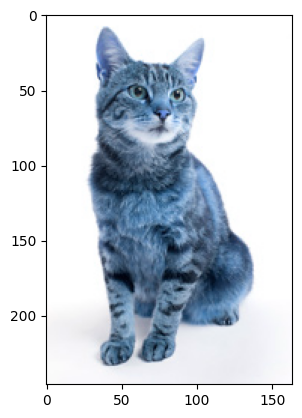

In [25]:
plt.imshow(test_image)

In [42]:
test_image = cv2.resize(test_image,(64, 64))
test_input = test_image.reshape((1,64, 64,3))

In [43]:
predictions_probs = model.predict(test_input)
predictions = np.argmax(predictions_probs)
predictions

1/1 [==============================] - 0s 18ms/step


0

Array[0] -> Cat <br>
Hence, the model has correctly predicted the given image of a cat

### Creating model using grid search - 21BAI1007
** Grid search is taking a lot of time to run, hence not including the output **

In [ ]:
# pip install scikeras

# from keras.layers import Wrapper
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# def create_model(optimizer="rmsprop", init = "glorot_uniform"):
#     model = models.Sequential()
#     model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(64, 64, 3)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dropout(0.1))
#     model.add(layers.Dense(1, activation='sigmoid'))
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# model2 = KerasClassifier(model=create_model, verbose=0)

# optimizers = ["rmsprop", "adam"]
# epochs = [50, 100]
# batches = [5, 10, 20]
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# grid = GridSearchCV(estimator=model2, param_grid=param_grid)
# grid_result = grid.fit(X_train, Y_train)

